# Negative Feedback - Homeostasis

#### Author(s):  Stanley Wang
#### Reference: [ Tyson et al (2003)](http://www.sciencedirect.com/science/article/pii/S0955067403000176) | [Download](https://cpi-catalog.000webhostapp.com/cpi-files/negative-feedback-homeostasis.cpi)

This is the 7th model from the Tyson et al (2003) paper. It is an example of a system that exhibits negative feedback.

Homeostasis results from negative feedback in the system in which an alteration in the system encourages the reduction of action in the system and tends to promote equilibrium. This example of a negative feedback system is referenced in BioModels BIOMD0000000309. In the model, the phosphorylation of E to EP is catalyzed by R however in doing so, R also inhibits its own synthesis through E.

### The Original System

From the graph (Figure 1 g), 3rd column in the Tyson et al (2003) paper) we see an initially high concentration of R when the signal is extremely low. As the signal increases however, there is a sharp decline in the R until the response value balances out with its degradation. We can explain this because more response is being degraded as the signal level increases.

However, as a consequence, there will be less response to inhibit its own synthesis through E. Significant changes in response value within the system gradually fades away as the system begins to show signs of maintaining a constant balance its internal equilibrium.

### The CPi Model

The overall trend in behaviour follows a promising pattern in accordance with the explanation given about the system. The system starts with a high value of response (over 1.5) but quickly responds to the increasing signal until the system manages to maintain a constant internal environment. The values decrease at a faster rate than observed in the paper with the final response value at S = 2 equal to 0.307 in contrast with the original paper in which the response value dips just under 5.


We are able to conclude that the model is satisfactory in replicating the general behaviour of the model but as with the mutual activation -and inhibition models, the implementation fails to capture the same numerical descriptions of the system as described by Tyson et al.

In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import CPi

In [3]:
cpi_model = CPi.ReadCPiFile('negative-feedback-homeostasis')

Select the model: negative-feedback-homeostasis
The processes in this cpi model are:
P


## Code

In [5]:
ode_def = cpi_model.view_processdef('P')

The cpi definitions of selected file are:

species S(a,c,e,n) = n.S(a,c,e,n) + a(b).b.S(a,c,e,n);

species R(c,e) = { d - u@0.01, d - t@100, f - g@10000 } c < u,t > .(RX(c,e,f,l) | d.g.0) + e.0;

species E(c,e,h,i) = h(x,y).(x.E(c,e,h,i) + y.EP(c,e,h,i)) + tau < 0.01 > .(E(c,e,h,i) | R(c,e));

species EP(c,e,h,i) = i(v,w).(v.EP(c,e,h,i) + w.E(c,e,h,i));

species A(j) = { k - s@0.01, k - t@50 } j < s,t > .k.A(j);

species RX(c,e,f,l) = { m - n@10000 } l < m > .n.f.0 + f.R(c,e);



process P = [0] S(a,c,e,n) || [0.01] A(j) || [0] EP(c,e,h,i) || [1] E(c,e,h,i) || [0] R(c,e) || [0] RX(c,e,f,l): { c - h@10001, i - j@5001, e - n@1, f - g@10000, a - l@1 } ;



## Plot

Time Start: 0.0, Time End: 10.0, Number of Times: 100.


<IPython.core.display.Javascript object>


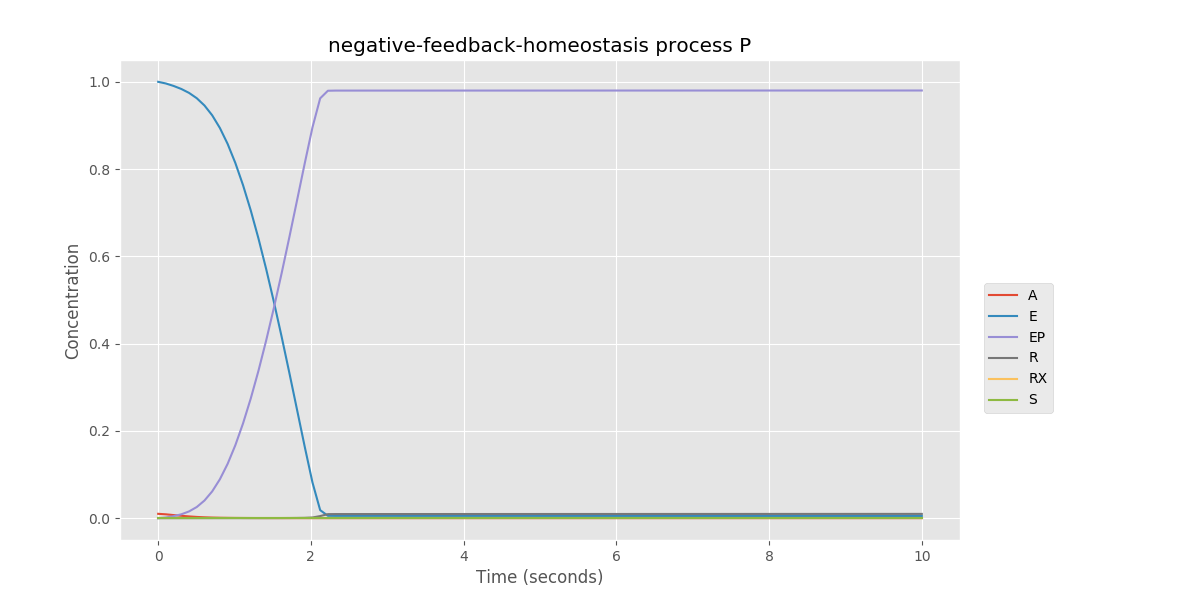

Picture will not be saved or you can change your selection.


In [7]:
solution = cpi_model.simulate_process('P','odeint', 0, 10, 100)
solution.show_plot()